In [1]:
# 예시 데이터셋 다운로드 링크
# 1. Yelp Reviews Dataset : https://www.kaggle.com/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_business.json
# 2. Online News Popularity DataSet : https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

# Chapter 2. Fancy Tricks with Simple Numbers

## 1. Scalars, Vectors, and Spaces 

- scalar: single numeric feature
- vector: an ordered list of scalars → vector들은 vector space에 존재한다.
- vector는 공간에서 하나의 점으로 표시할 수 있다.
<br>
예시: two-dimentional vector v = [2, 1]

<img src="img/figure2-1.png" width="250" height="250">

## 2. Dealing with Counts

- 빅데이터 시대에 count는 빠른 속도로 계속해서 축적되고 있기 때문에 매우 큰 값을 가지는 경우가 많다. 
- 따라서 데이터의 scale을 확인하여 원 데이터를 그대로 쓸지, 아니면 데이터를 가공하여 사용할 지 결정해야 한다. 

### 2.1 Binarization

예시: The Echo Nest Profile Dataset  
- Echo Nest의 이용자 100만명의 노래 듣기 기록 데이터를 제공함
- 이용자 ID, 노래 ID, 노래를 들은 횟수로 이루어짐

<img src="img/figure2-2.png" width="500" height="600">
<center>(출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly))</center>  

- 데이터셋의 데이터를 이용하여 특정 사용자가 특정 노래를 얼마나 좋아할지 예측하려고 한다.

1. 사람들마다 노래를 듣는 습관이 다르기 때문에, raw listen count는 특정 사용자의 노래 선호도에 대한 robust measure가 아니다. 또한 raw listen count의 값이 너무 크다는 문제점이 있다.  
2. 더 robust한 방법은 [raw listen count=0, raw listen count≥1] 두 집단으로 binarize하는 것이다. (1번이라도 노래를 들었다면 그 노래를 좋아하는 것으로 분류)

- 위의 예시는 엄밀히 말하면 feature가 아닌 taget variable을 조작하는 과정이었다. target은 모델의 인풋이 되지 않기 때문에 feature가 아니지만, 문제를 적절하게 해결하기 위해서 때때로 taget을 다뤄야하는 경우가 존재한다. 

### 2.2 Quantization or Binning 

예시: Yelp Reviews Dataset
<br>
- 다양한 비지니스(예: 레스토랑, nightlife venue)에 대한 고객들의 리뷰로 이루어진 데이터 

In [86]:
import pandas as pd
import numpy as np
import json

In [87]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.03-06_Counts.ipynb 

#Yelp Reviews Dataset을 불러와 데이터프레임에 저장하기 
biz_f = open('C:\\Users\\이인주\\Desktop\\2020 summer study\\feature_engineering\\data\\yelp_academic_dataset_business.json', 'r', encoding='UTF-8')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

#Yelp Reviews Dataset 상위 5개 행의 데이터만 가져오기
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

<IPython.core.display.Javascript object>


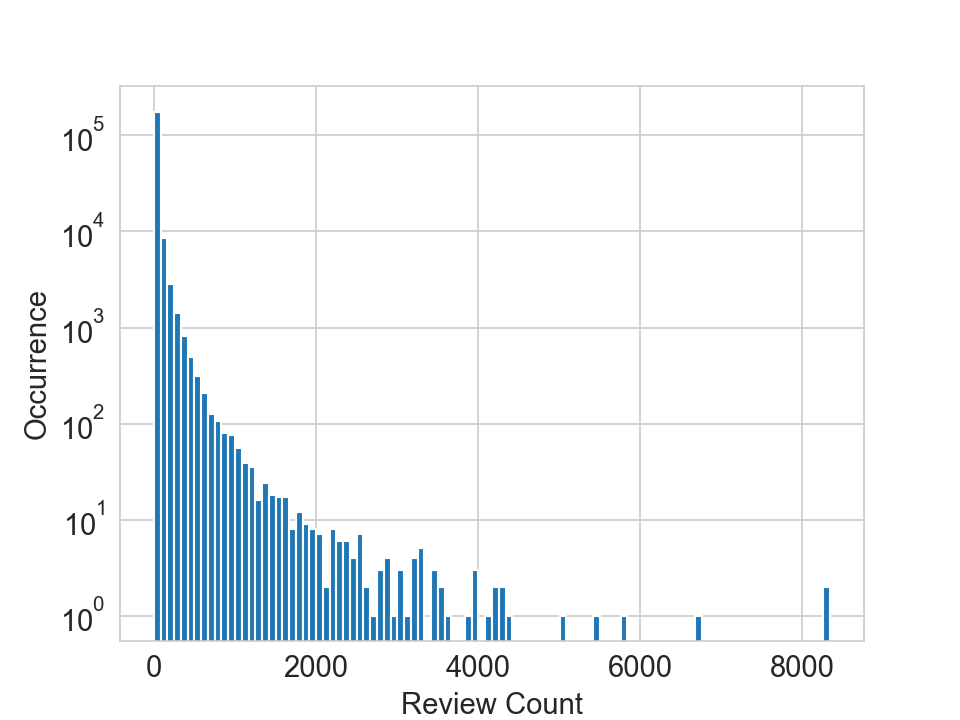

Text(0, 0.5, 'Occurrence')

In [72]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.03-06_Counts.ipynb 

#Yelp Reviews Dataset 시각화하기
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

- 리뷰 개수(feature)를 이용하여 특정 비지니스에 대한 사람들의 평가를 예측하려고 한다.

- 그러나 raw data가 serveral orders of magnitude에 걸쳐져 있을 경우, raw data 그대로 모델에 사용하면 여러 문제가 발생할 수 있다. 
- 따라서 raw data를 quantize 해야 한다. (raw data를 여러 bin으로 나누어서 raw data 값은 버리고 bin만 이용하는 것, 즉 연속적인 숫자 → discrete bin that represent a measure of intensity)

- bin의 범위를 정하는 방법 2가지: (1) fixed-width (2) adaptive

#### (1) Fixed-width binning

- 각 bin이 범위를 직접 설정하는 방법
- 이 범위는 1. custom designed or automatically segmented 될 수 있고, 2. linearly scaled or exponentially scaled 될 수도 있다. 

1. Custom designed range
<br>
예시: 나이를 나눌때 →  0-12세/12-17세/18-24세/25-34세...

2. Automatically segmented range 
<br>
2.1 bin의 범위로 raw data를 나눈 후, 그 몫을 이용하여 데이터를 어떤 bin에 포함할지 정하기 (linearly scaled)
<br> 예시: 10살 단위로 나이를 나누어 구분 → 0-9세는 bin 1, 10-19세는 bin 2 ... 
<br>
<br>
2.2 raw data에 log를 씌운 후, 그 결과값으로 데이터를 어떤 bin에 포함할지 정하기 (exponentially scaled)
<br>
예시: 10-99는 bin 1. 100-999는 bin 2 ...

In [73]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.03-06_Counts.ipynb

#linearly scaled range 
small_counts = np.random.randint(0, 100, 20) #0~99 사이에서 20개를 무작위로 선택 
np.floor_divide(array_a, 10) #small_counts array의 데이터들을 10으로 나눈다

array([1, 0, 3, 6, 9, 3, 3, 0, 6, 2, 1, 2, 9, 6, 3, 3, 0, 0, 0, 7],
      dtype=int32)

In [75]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.03-06_Counts.ipynb

#exponentially scaled range
#several magnitudes에 걸쳐져 있는 데이터 
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222] 
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

#### (2) Quantile binning (adaptive)

- 만약 raw data 사이에 큰 갭이 존재한다면, fixed-width binning을 이용할 경우 데이터가 존재하지 않는 비어있는 bin들이 생기게 된다. 
- 데이터의 분포에 맞추어 bin의 범위를 정하는 것이 필요하고, 이때 데이터 분포의 quantile을 사용한다. 
- bin의 범위를 직접 설정하는 것이 아니라, 데이터 분포에 따라 자동으로 정해진다. 

- Quantiles: 데이터를 동일한 비율로 구분해주는 값 (예: median(2), quarters(4), deciles(10))

In [80]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.03-06_Counts.ipynb

#quarters 구하기
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222] 

series = pd.Series(large_counts)
quarters = series.quantile([0.25, 0.50, 0.75])
print(quarters)

# raw data - quarter 연결 
pd.qcut(large_counts, 4, labels=False) #qcut(): 동일한 개수로 나누기

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64


array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

## 3. Log Transformation

- 로그함수는 큰 수의 범위는 압축하고, 작은 수의 범위는 늘리는 기능을 한다. 

<img src="img/figure2-3.png" width="400" height="400">
<center>(출처: https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8)</center>  

- 따라서 log transform은 heavy-tailed distribution을 가진 데이터를 다룰 때 용이하다. 
- 데이터 분포의 위쪽 끝 부분의 긴 tail을 짧게 압축하고, 분포 아래쪽 끝 부분에 압축되어 있는 데이터들을 넓게 퍼트린다. 

In [81]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.06-11_Log-Transformation_prediction.ipynb

# review count에 log transform을 적용 
#'review_count'열에 있는 값들에 로그를 씌워 나온 결과값들을 'log_review_count' 라는 새로운 열에 저장
# 데이터값이 0이어서 log transform을 취함으로써 음의 무한대 값이 나오는 것을 막기 위해 1을 더함 
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,log_review_count
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ,0.778151
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,2.110590
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,2.232996
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ,0.602060
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC,0.698970


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

<IPython.core.display.Javascript object>


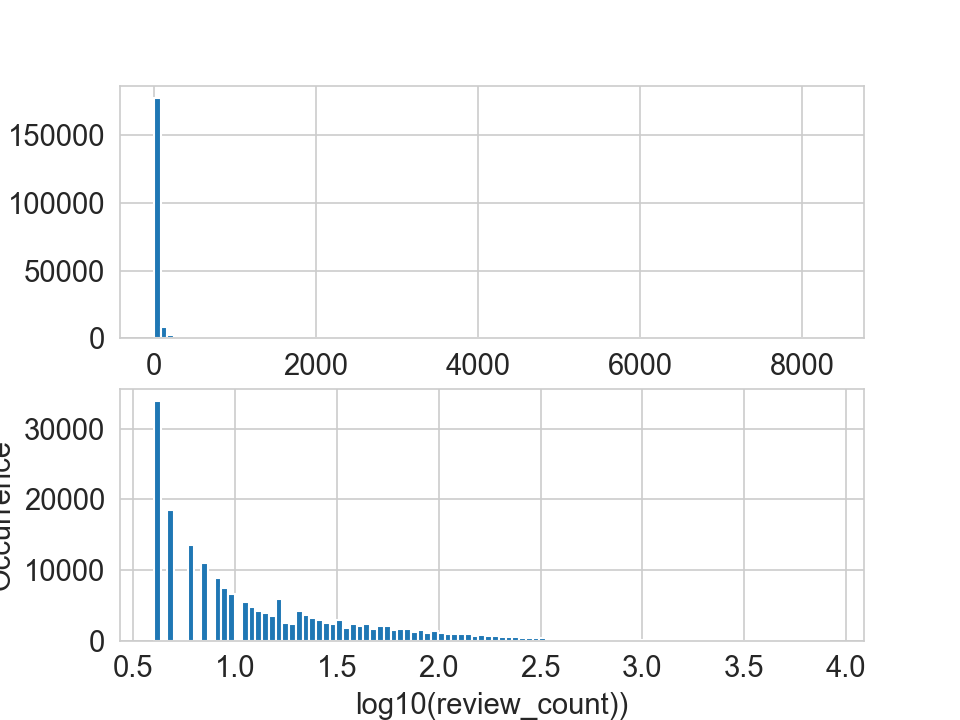

Text(0, 0.5, 'Occurrence')

In [83]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.06-11_Log-Transformation_prediction.ipynb

# log transform 전후의 데이터 분포를 시각화
plt.figure()
ax = plt.subplot(2,1,1)
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('review_count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

ax = plt.subplot(2,1,2)
biz_df['log_review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('log10(review_count))', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

### 3.1 Log Transform in Action

- log transform을 이용하여 supervised learning을 수행하는 방법

예시
- Yelp Reviews Dataset을 이용하여 리뷰수로 비지니스에 대한 사람들의 평가를 예측하고자 함
- scikit-learn 라이브러리를 통해 10-fold validation of linear regression를 사용
- log transform을 적용한 feature와 적용하지 않은 feature 중 무엇을 사용할 때 모델의 성과가 더 좋은지 비교. (모델의 성과는 데이터셋을 통해 훈련시킨 모델이 새로운 데이터를 얼마나 잘 예측하는지를 나타내는 것으로 R-squred 점수로 판단. R-squred 점수가 높을수록 성과가 좋은 것)

In [10]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [84]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.06-11_Log-Transformation_prediction.ipynb
# k-fold cross validiation: https://nonmeyet.tistory.com/entry/KFold-Cross-Validation%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D-%EC%A0%95%EC%9D%98-%EB%B0%8F-%EC%84%A4%EB%AA%85

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00160 (+/- 0.00090)
R-squared score with log transform: 0.00408 (+/- 0.00147)


- 실제로 Yelp Reviews Dataset의 scattor plot을 그려보면, 리뷰수와 사용자의 평가 사이의 linear relationship이 존재하지 않는 것을 확인할 수 있다. 따라서 linear regression model의 성과가 안좋게 나올 수 밖에 없다.

<IPython.core.display.Javascript object>


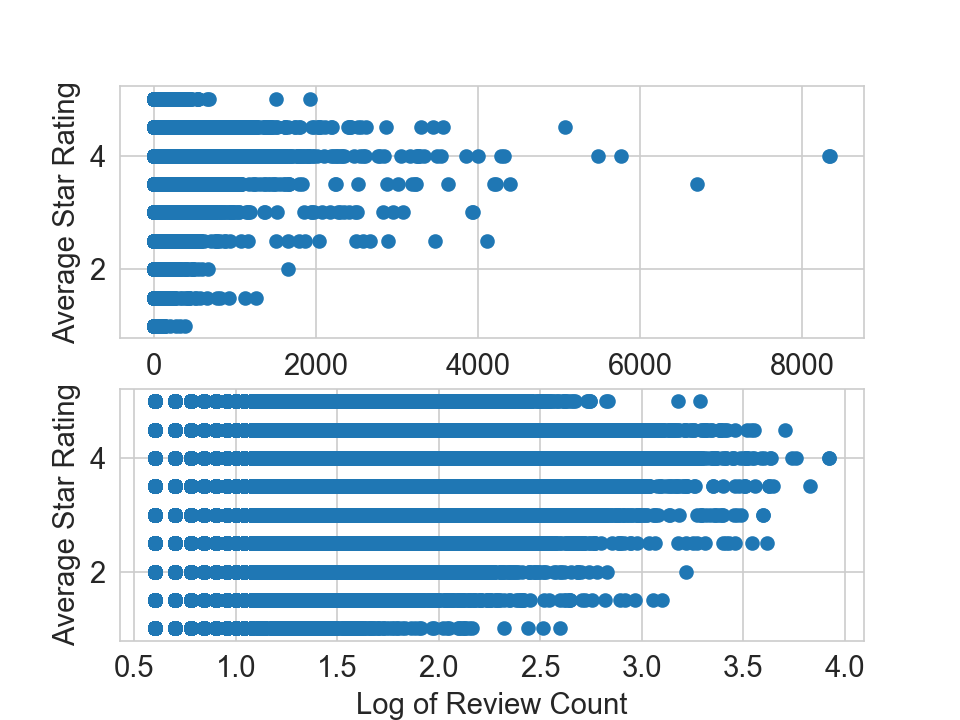

Text(0, 0.5, 'Average Star Rating')

In [85]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.06-11_Log-Transformation_prediction.ipynb

plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

### 3.2 Power Transforms: Generalization of the Log Transform 

- log transform은 power transforms 중 하나이다. 
- poswer transforms은 통계적인 용어로 variance-stabilizing transformations라고도 칭한다. 

#### Box-Cox transform

<img src="img/figure2-4.png" width="200" height="200">

- power transform의 다양한 종류를 일반화한 형태
- lambda가 1보다 작으면 데이터의 큰 값들을 압축시키고, lambda가 1보다 크면 데이터의 작은 값들을 압축시킨다. 

<img src="img/figure2-5.png" width="500" height="500">
<center>(출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly))</center>  

- Box-Cox transform을 적용하기 위해선 모든 데이터들이 양수여야 한다. 따라서 데이터에 음수값이 있을 경우, 모든 데이터에 특정 상수를 더함으로써 데이터 값들을 조정해야 한다. 
- Box-Cox transform을 적용하기 위해선 lambda 값을 정해야 하며, maximum likelihood 또는 Bayesian method를 통해 그 값을 구할 수 있다. 
- SciPy's stats package를 통해 Box-Cox transform을 사용할 수 있다. 

- 예시: Yelp Review Counts에 Box-Cox trasformation 적용하기

In [88]:
from scipy import stats

In [89]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.12-14_Box-Cox_Transform.ipynb

# Box-Cox transform의 경우 모든 인풋 데이터가 양수여야 함으로, 최소값을 통해 이 가정을 충족하는지 확인하기 
min = biz_df['review_count'].min()
print(min)

# lambda = 0 으로 설정하여 log transform 적용하기
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)

# 디폴트로 scipy을 통해 Box-Cox transform을 시행하면 결과가 정규분포와 비슷하게 나오도록 하는 lambda값을 자동으로 찾음
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
print(bc_params) #자동으로 찾은 lambda값 

# Yelp Review Dataset에 Box-Cox transform과 log transform을 적용한 값들 저장하기 
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log
biz_df.head()

3
-0.37107910850437914


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,rc_bc,rc_log
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ,1.211778,1.609438
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,2.249606,4.852030
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,2.294105,5.135798
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ,0.902242,1.098612
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC,1.083746,1.386294


<IPython.core.display.Javascript object>


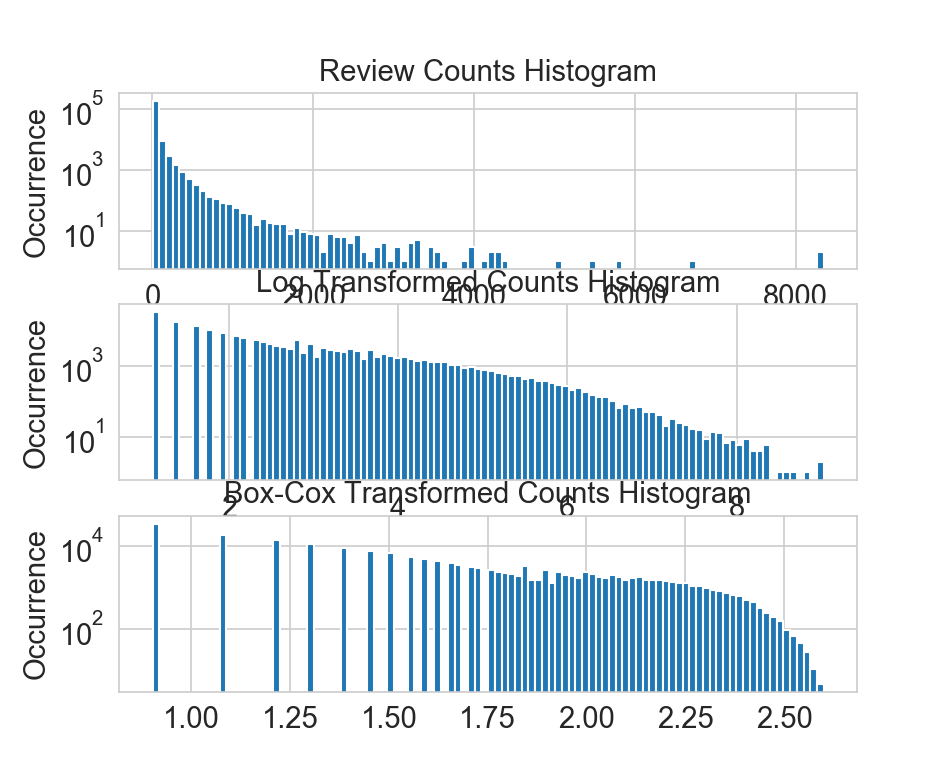

Text(0, 0.5, 'Occurrence')

In [90]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.12-14_Box-Cox_Transform.ipynb

# 히스토그램으로 시각화
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# original reiew count 
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# review count after optimal Box-Cox transform
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

- probability plot(probplot)을 통해 실제 데이터의 분포와 이론적 분포를 비교할 수 있음 

예시: original/transformed feature(Yelp Review Counts)의 분포와 정규분포 비교
- 리뷰 개수는 양수일 수 밖에 없으므로 그래프의 양수 측면에 초점을 맞추어서 봐야한다. 
- 빨간색 선이 정규분포를 나타내며, original 데이터보다, transformed 데이터가 정규분포에 더 가까워진 것을 확인할 수 있다. 

<IPython.core.display.Javascript object>


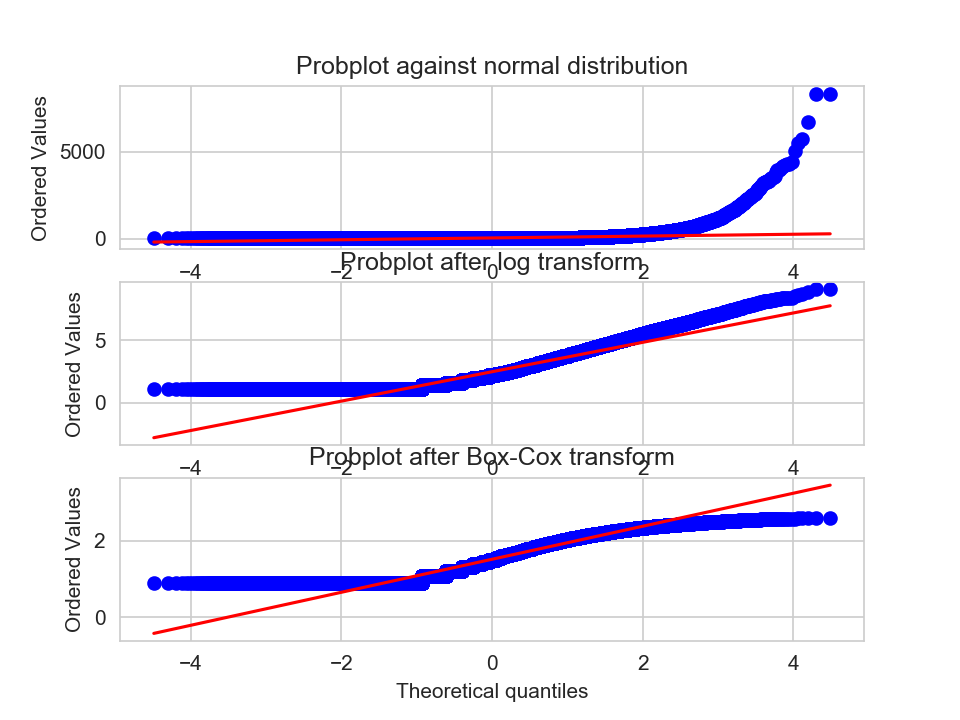

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

In [91]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.12-14_Box-Cox_Transform.ipynb

fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')
prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

## 4. Feature Scaling or Normalization 

- linear regrssion, logistic regrssion과 같이 smooth function을 가지고 있는 모델은 인풋 데이터 scale의 영향이 큰 반면, tree-based model 같은 모델은 데이터 scale의 영향이 작다. 
- 사용하려는 모델이 데이터 scale에 민감한 경우, feature scaling을 통해 feautre의 scale을 조정할 수 있다. 
- feature scaling은 feature을 상수로 나눔으로써 조작하기 때문에, feature 분포의 모양을 바꾸지는 않는다. 

예시: Online News Popularity Dataset 
- Mashable에서 2년동안 발행된 뉴스 기사 39,797개의 60개 feature들로 이루어짐
- 기사의 단어 개수로 그 기사의 인기도(소셜 미디어에서 공유된 횟수)를 예측하고자 함

In [61]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import sklearn.preprocessing as preproc

In [92]:
#코드 출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly)

df = pd.read_csv('C:\\Users\\이인주\\Desktop\\2020 summer study\\feature_engineering\\data\\OnlineNewsPopularity.csv', delimiter=', ')
df['n_tokens_content'].as_matrix()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([219., 255., 211., ..., 442., 682., 157.])

### 4.1 Min-Max Scaling 

- 모든 feature을 0과 1사이의 값을 가지도록 압축하는 방법

<img src="img/figure2-6.png" width="400" height="400">
<center>(출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly))</center>  

In [98]:
#코드 출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly)

preproc.minmax_scale(df[['n_tokens_content']])

array([[0.02584376],
       [0.03009205],
       [0.02489969],
       ...,
       [0.05215955],
       [0.08048147],
       [0.01852726]])

### 4.2 Standardization (Variance Scaling)

- feature scaling 후 feature들의 평균이 0 분산이 1이 되도록 만든다. 

<img src="img/figure2-7.png" width="400" height="400">
<center>(출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly))</center>  

In [99]:
#코드 출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly)

preproc.StandardScaler().fit_transform(df[['n_tokens_content']])

array([[-0.69521045],
       [-0.61879381],
       [-0.71219192],
       ...,
       [-0.2218518 ],
       [ 0.28759248],
       [-0.82681689]])

### 4.3 L² Normalization

- original feature을 정규화(normalize)한다. 
- L² normalization 이후, feature column이 norm 1이 되는 특징을 가지고 있다. 

<img src="img/figure2-8.png" width="400" height="400">
<center>(출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly))</center>  

In [100]:
#코드 출처: Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly)

preproc.normalize(df[['n_tokens_content']], axis=0) # axis=0 : nomalize each feature / axis=1 : normalize each sample 

array([[0.00152439],
       [0.00177498],
       [0.00146871],
       ...,
       [0.00307663],
       [0.0047472 ],
       [0.00109283]])

## 5. Interaction Features 

- 논리 연산자 AND와 같은 기능을 한다. 
- 여러 feature의 쌍을 이용하여 특정 결과를 계산하는 것을 의미한다. 
- 예시: 고객의 나이와 거주 위치를 이용하여 특정 제품에 대한 고객의 선호도를 예측하기 
<br>
<br>
- decision-tree based model은 interaction feature의 개념을 자유롭게 사용한다. 
- linear model에도 interaction feature 개념을 적용시킬 수 있다. 

<center>[ feature 간의 linear combination만을 포함시킨 모델 ]</center>
$$ y = w_1x_1+w_2x_2+...+w_nx_n$$

<center>[ feature의 쌍 간의 linear combination까지 포함시킨 모델 ]</center>
$$ y = w_1x_1+w_2x_2+...+w_nx_n+w_1,_1x_1x_1+w_1,_2x_1x_2+w_1,_3x_1x_3+...$$

예시: Online News Popularity Dataset에서 interaction feature을 이용하여 특정 기사의 인기도 예측하기 

In [96]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [97]:
#코드 출처: https://github.com/alicezheng/feature-engineering-book/blob/master/02.17_Interaction_Features_Example.ipynb

# content-based feature만 골라내기 
features = ['n_tokens_title', 'n_tokens_content',
            'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
            'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
            'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']

# X를 통해 Y를 예측하는 것이 목표 
X = df[features]
y = df[['shares']]

#interaction feature 만들어내기 
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)

# train set와 test set 각각 만들기
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

# training set를 이용해서 linear regression model을 학습시키고, test set을 이용해 그 결과를 평가한 결과값을 산출하는 함수 정의
def evaluate_feature(X_train, X_test, y_train, y_test):
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

# single feature의 조합만을 이용하여 예측한 모델
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

# interaction feature의 조합도 추가하여 예측한 모델
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113258850


## 6. Feature Selection

- 모델의 complexity를 줄이기 위해 유용하지 않은 feature을 제외하는 작업 
- 예측의 정확도에는 손상을 주지 않으면서도 간결하여 계산이 빠른 모델을 설정하는 것을 목표로 한다.  

### 6.1 Filtering
- 모델에서 사용될 가능성이 적은 feature을 제거하는 방법
- 어떤 모델을 사용하는지를 고려하는 방법이 아니기 때문에, 특정 모델에 있어서는 유용한 feature도 제거해버리는 가능성이 존재한다.

### 6.2 Wrapper methods 
- feature의 하위집단들을 테스트해보는 방법. 따라서 단독으로는 유용해보이지 않지만 특정 조합으로 이용할 때 유용한 feature들을 제거해버리는 것을 방지할 수 있다. 
- compuatitional expense가 높다는 단점이 존재한다. 

### 6.3 Embedded methods
- 모델 훈련 과정에서 feature selection을 하는 방법 
- wrapper methods처럼 모델 결과의 질이 높지는 않지만, wrapper methods만큼 computational expense가 많이 들지는 않는다. 따라서 computational expense와 결과의 질 사이의 균형을 맞춘 방법
- 예시: decision tree model에서 다음 단계로 넘어가기 위해 특정 feature을 선택하는 것을 계속 반복하게 됨

## 요약

- numeric feature engineering: quantization, feature sacling, power transform, interaction features 등이 존재한다. 
- feature selection technique은 많은 양의 interaction feature을 다룰 때 중요하다. 
- 머신러닝에서 모든 형태의 데이터는 결국 numeric feature의 형태를 띄게 되므로, numeric feature engineering technique을 잘 숙지하고 있어야 한다. 